#Automobile Insurance Fraud Detection

###Hamidah, 1606824452

This section consists of 3 parts, namely: 
1. Exploratory Data Analysis
2. Preprocessing Data and Feature Engineering
3. Model Training and Evaluation

## Part 1 : Exploratory Data Analysis

In [0]:
#Import Data
import pandas as pd
import numpy as np
data = pd.read_excel("Automobile Insurance Claim Data.xlsx")
data.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Unknown,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,UNKNOWN,0,0,UNKNOWN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,UNKNOWN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Unknown,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,UNKNOWN,0,0,UNKNOWN,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,2015-02-27,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,UNKNOWN,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,2015-01-30,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,2015-01-05,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,UNKNOWN,42300,4700,4700,32900,Saab,92x,1996,N


In [0]:
#Types of Data
data.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [0]:
#Change Data Type
type_var = {'policy_number': str, 'insured_zip': str} 
data = data.astype(type_var)
data.dtypes

months_as_customer                      int64
age                                     int64
policy_number                          object
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                            object
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [0]:
#Define Categorical Data
cat_var = ["policy_bind_date","policy_number", "policy_state","policy_csl","insured_zip","insured_sex","insured_education_level","insured_occupation","insured_hobbies",
           "incident_date","insured_relationship","incident_type","collision_type","incident_severity","authorities_contacted","incident_state","incident_city",
           "incident_location","property_damage","police_report_available","auto_make","auto_model","fraud_reported"]
cat_data = data[["policy_bind_date","policy_number", "policy_state","policy_csl","insured_zip","insured_sex","insured_education_level","insured_occupation","insured_hobbies",
           "incident_date","insured_relationship","incident_type","collision_type","incident_severity","authorities_contacted","incident_state","incident_city",
           "incident_location","property_damage","police_report_available","auto_make","auto_model","fraud_reported"]]

In [0]:
#Define Numerical Data
num_var= ["months_as_customer","age","policy_number","policy_deductable","policy_annual_premium","umbrella_limit","insured_zip","capital-gains","capital-loss",
          "incident_hour_of_the_day","number_of_vehicles_involved","bodily_injuries","witnesses","total_claim_amount","injury_claim","property_claim","vehicle_claim","auto_year"]
num_data = data[["months_as_customer","age","policy_number","policy_deductable","policy_annual_premium","umbrella_limit","insured_zip","capital-gains","capital-loss",
          "incident_hour_of_the_day","number_of_vehicles_involved","bodily_injuries","witnesses","total_claim_amount","injury_claim","property_claim","vehicle_claim","auto_year"]]

In [0]:
#Descriptive Statistics of Categorical Data
cat_data.describe(include='all')

,policy_bind_date,policy_number,policy_state,policy_csl,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,incident_date,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,1000,3,3,995,2,7,14,20,60,6,4,4,4,5,7,7,1000,3,3,14,39,2
top,1992-04-28 00:00:00,651861,OH,250/500,431202,FEMALE,JD,machine-op-inspct,reading,2015-02-02 00:00:00,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,6467 Best Ave,UNKNOWN,NO,Dodge,RAM,N
freq,3,1,352,351,2,537,161,93,64,28,183,419,292,354,292,262,157,1,360,343,80,43,753
first,1990-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Policy Bind Date Descriptive
data["policy_bind_date"].describe()

count                    1000
unique                    951
top       1992-04-28 00:00:00
freq                        3
first     1990-01-08 00:00:00
last      2015-02-22 00:00:00
Name: policy_bind_date, dtype: object

In [0]:
#Knowing About the Incident Date
data["incident_date"].describe()

count                    1000
unique                     60
top       2015-02-02 00:00:00
freq                       28
first     2015-01-01 00:00:00
last      2015-03-01 00:00:00
Name: incident_date, dtype: object

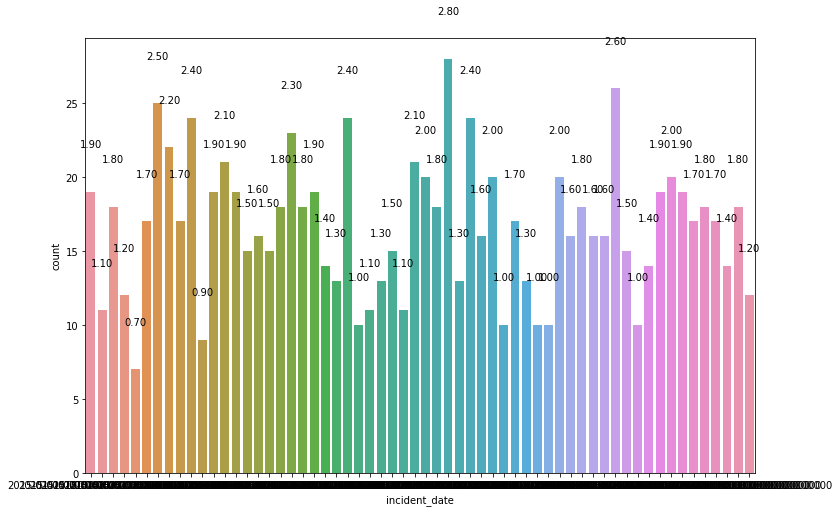

In [0]:
#Incident Date Distribustion
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))

total = float(len(data["fraud_reported"]) )
ax = sns.countplot(x="incident_date", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [0]:
#Incident Date Sorted by Month
data['incident_date'] = data['incident_date'].dt.strftime('%Y-%m')

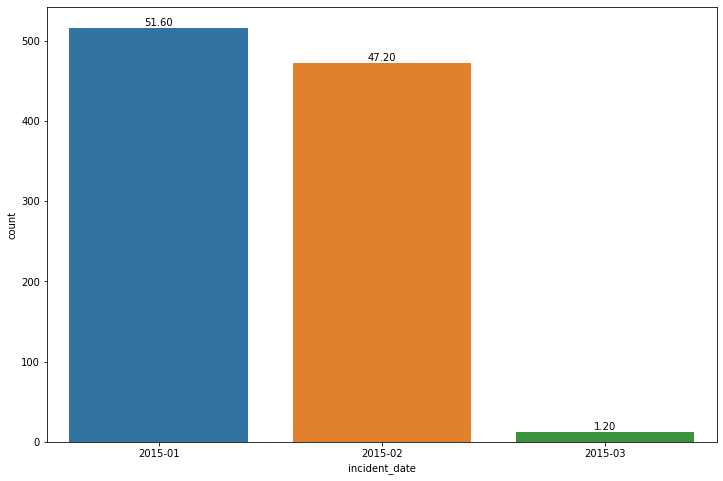

In [0]:
#Incident Date Distribustion Sorted by Month
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))

total = float(len(data["fraud_reported"]) )
ax = sns.countplot(x="incident_date", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

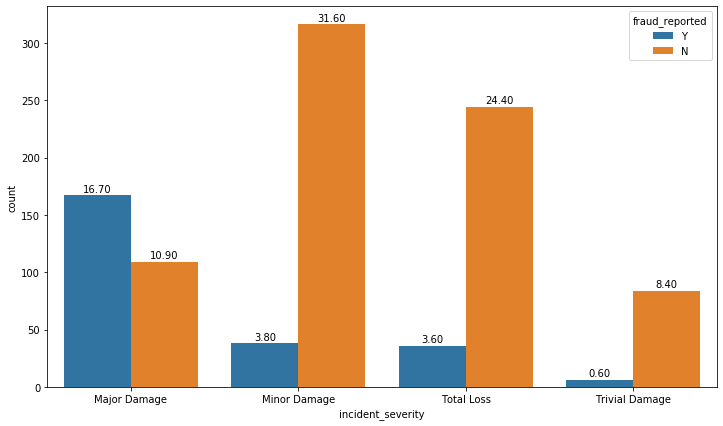

In [0]:
#Incident Severity Distribution
plt.figure(figsize=(12,7))
total = float(len(data["fraud_reported"]) )

ax = sns.countplot(x="incident_severity", hue="fraud_reported", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

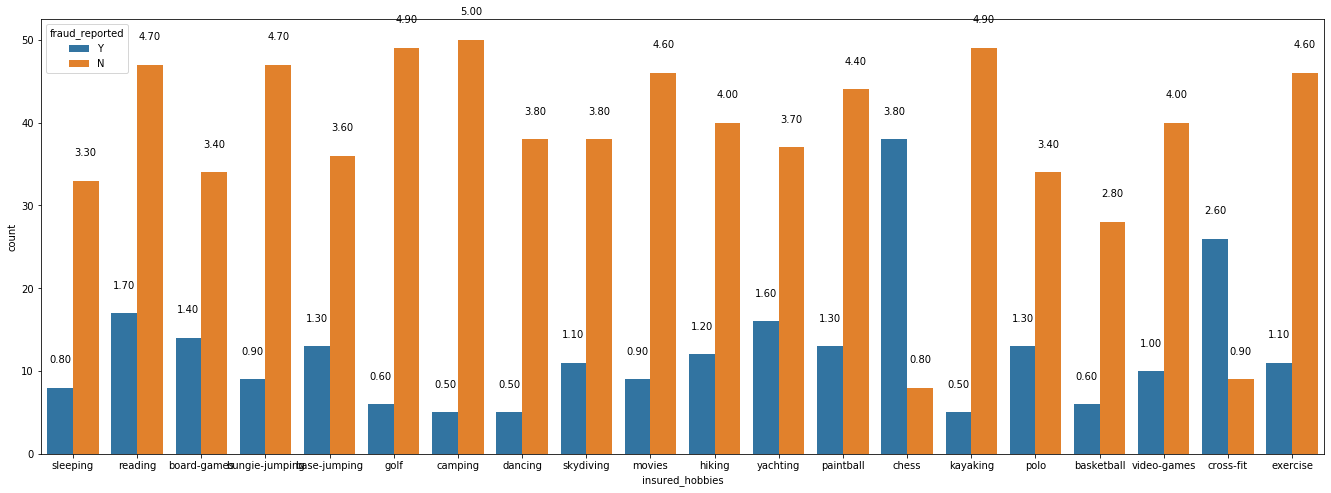

In [0]:
#Insured Hobbies Distribution
plt.figure(figsize=(23,8))
total = float(len(data["fraud_reported"]) )

ax = sns.countplot(x="insured_hobbies", hue="fraud_reported", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

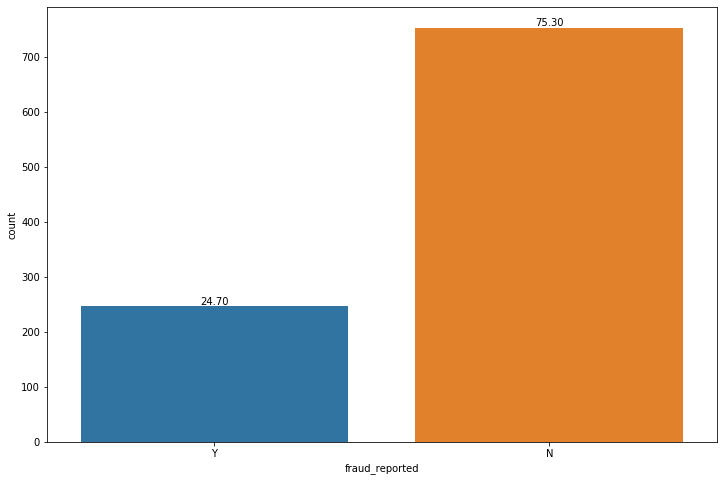

In [0]:
#Fraud Reported Frequency
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))

total = float(len(data["fraud_reported"]) )
ax = sns.countplot(x="fraud_reported", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [0]:
data["fraud_reported"].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [0]:
#Descriptive Statistics of Numerical Data
num_data.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


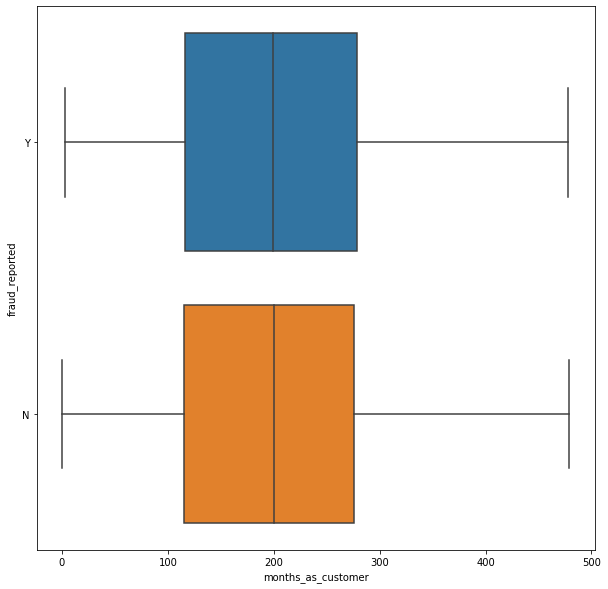

In [0]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="months_as_customer", y="fraud_reported", data=data)
plt.show()

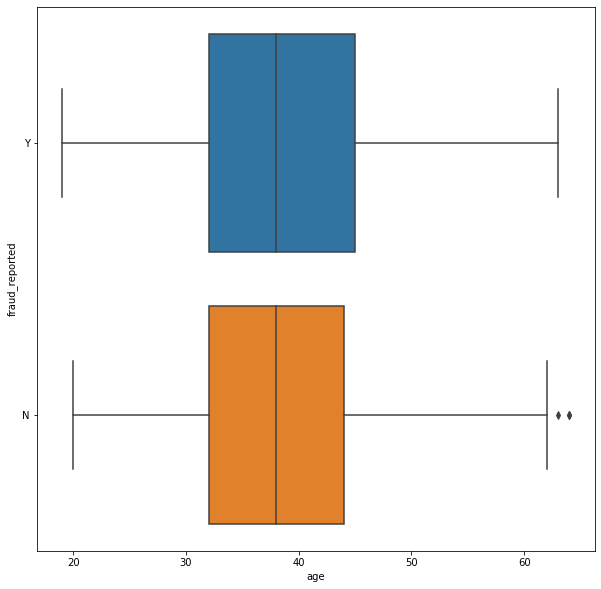

In [0]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="age", y="fraud_reported", data=data)
plt.show()

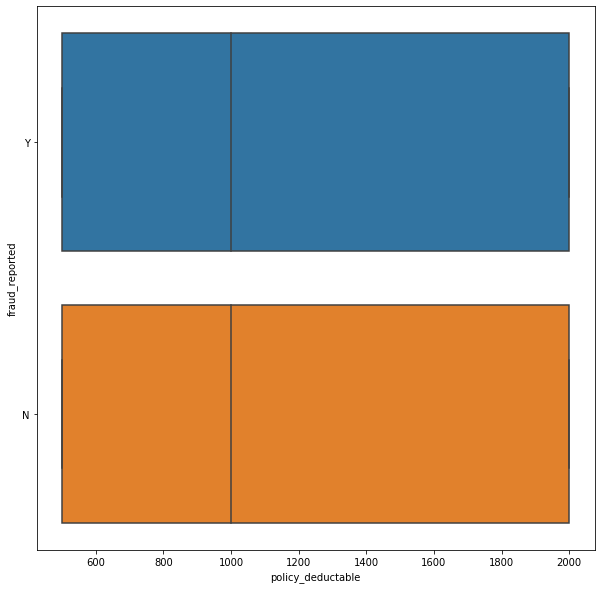

In [0]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="policy_deductable", y="fraud_reported", data=data)
plt.show()

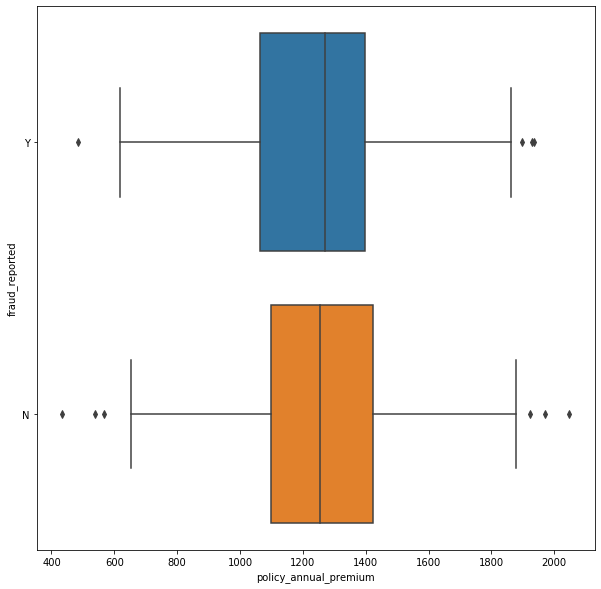

In [0]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="policy_annual_premium", y="fraud_reported", data=data)
plt.show()

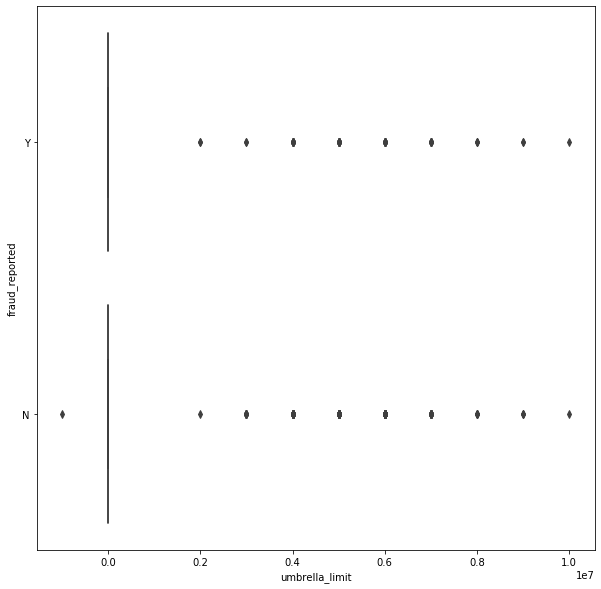

In [0]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="umbrella_limit", y="fraud_reported", data=data)
plt.show()

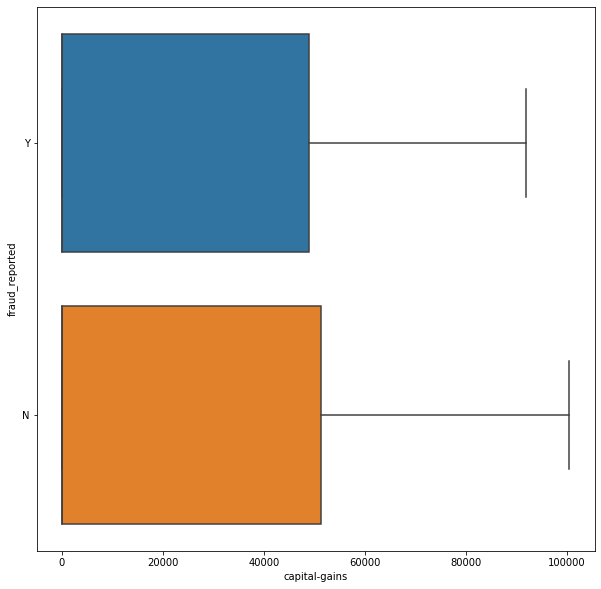

In [0]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="capital-gains", y="fraud_reported", data=data)
plt.show()

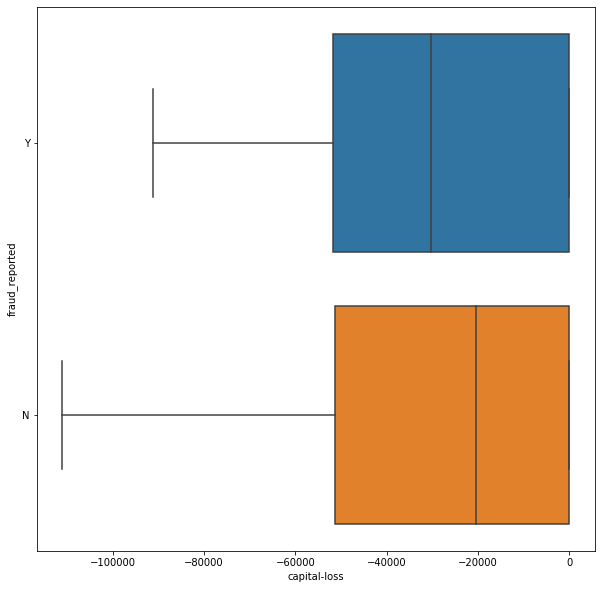

In [0]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="capital-loss", y="fraud_reported", data=data)
plt.show()

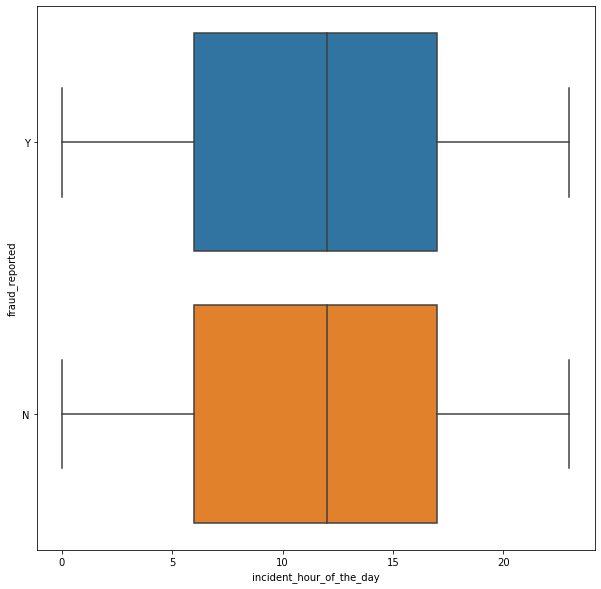

In [0]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="incident_hour_of_the_day", y="fraud_reported", data=data)
plt.show()

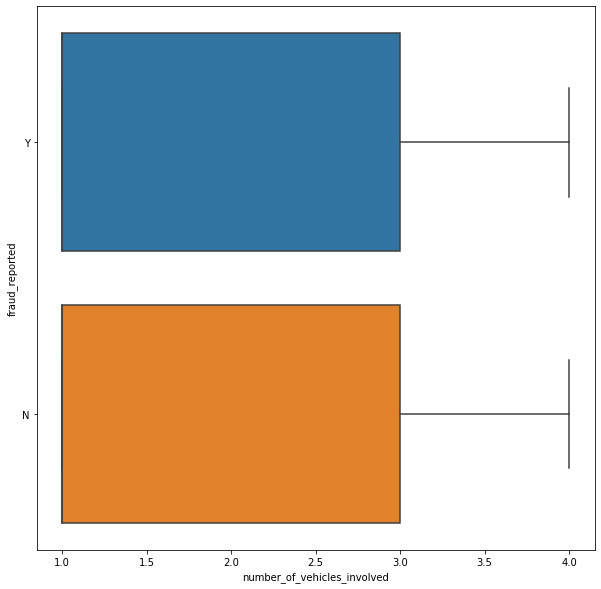

In [0]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="number_of_vehicles_involved", y="fraud_reported", data=data)
plt.show()

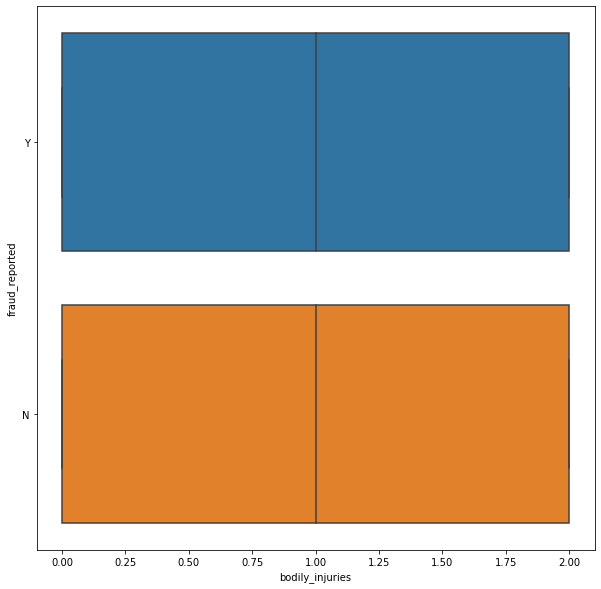

In [0]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="bodily_injuries", y="fraud_reported", data=data)
plt.show()

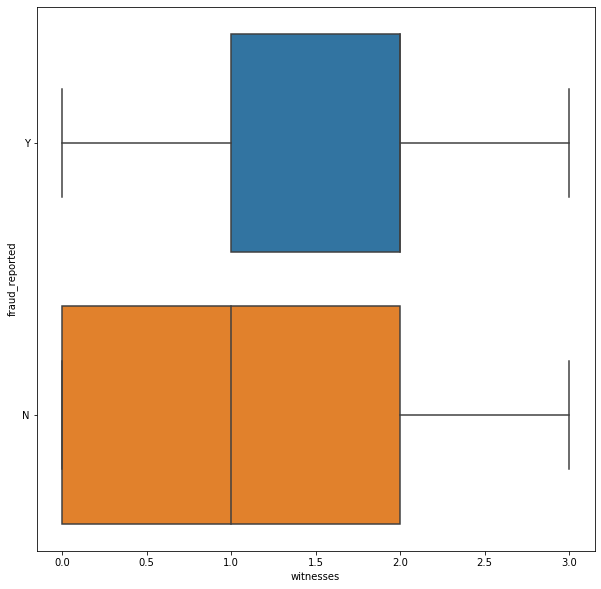

In [0]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="witnesses", y="fraud_reported", data=data)
plt.show()

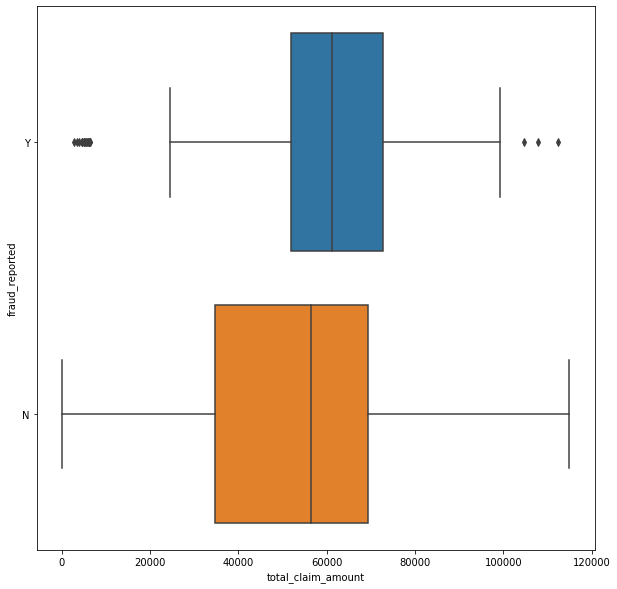

In [0]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="total_claim_amount", y="fraud_reported", data=data)
plt.show()

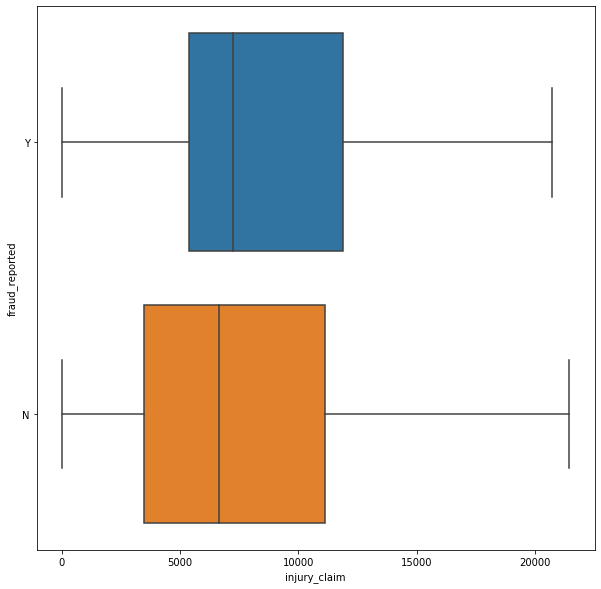

In [0]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="injury_claim", y="fraud_reported", data=data)
plt.show()

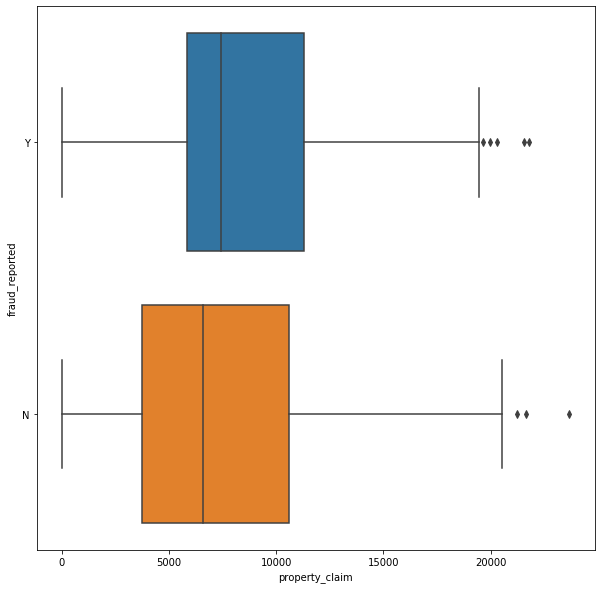

In [0]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="property_claim", y="fraud_reported", data=data)
plt.show()

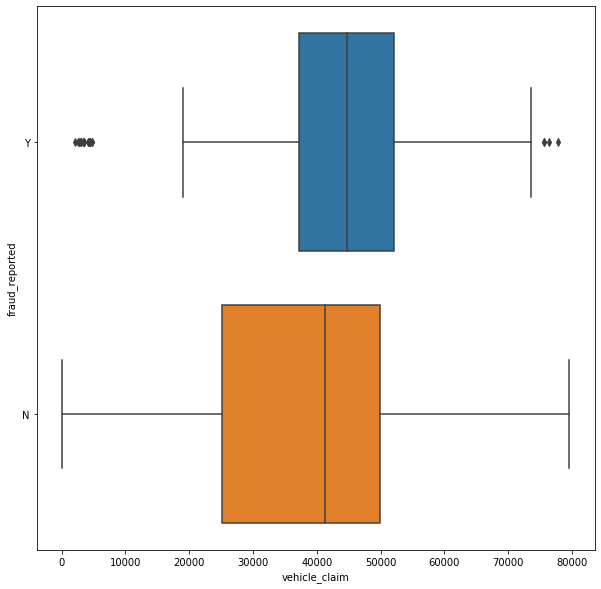

In [0]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="vehicle_claim", y="fraud_reported", data=data)
plt.show()

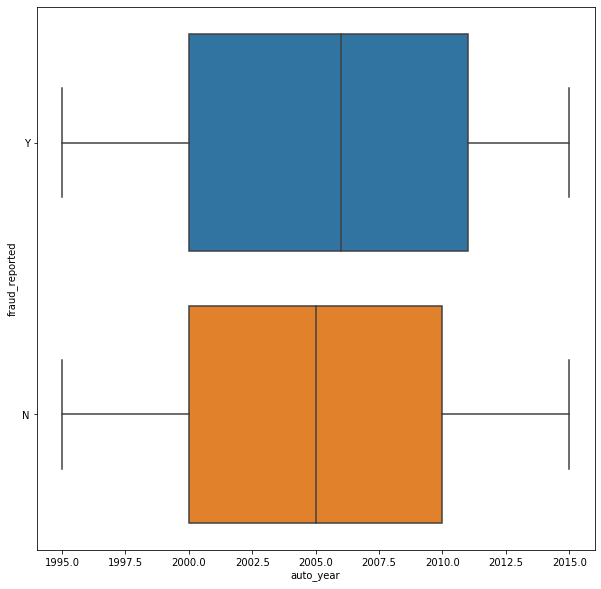

In [0]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="auto_year", y="fraud_reported", data=data)
plt.show()

##Part 2 : Preprocessing Data and Feature Engineering

In [0]:
data_preprocess = data

In [0]:
#Delete Unimportant Variables
del data_preprocess["policy_number"]
del data_preprocess["policy_bind_date"]
del data_preprocess["insured_zip"]
del data_preprocess["incident_date"]
del data_preprocess["incident_location"]

In [0]:
data_preprocess

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Unknown,Minor Damage,Police,VA,Riverwood,8,1,UNKNOWN,0,0,UNKNOWN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,UNKNOWN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Unknown,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,UNKNOWN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,UNKNOWN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,UNKNOWN,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,UNKNOWN,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [0]:
#Data Normalization
from sklearn import preprocessing
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True)
data_preprocess[["months_as_customer","age","policy_deductable","policy_annual_premium","umbrella_limit","capital-gains","capital-loss","incident_hour_of_the_day",
                 "number_of_vehicles_involved","bodily_injuries","witnesses","total_claim_amount","injury_claim","property_claim","vehicle_claim","auto_year"]] = scaler.fit_transform(data_preprocess[["months_as_customer","age","policy_deductable","policy_annual_premium","umbrella_limit","capital-gains","capital-loss",
                                         "incident_hour_of_the_day","number_of_vehicles_involved","bodily_injuries","witnesses","total_claim_amount","injury_claim",
                                         "property_claim","vehicle_claim","auto_year"]])
data_preprocess

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,1.078140,0.990836,OH,250/500,-0.222383,0.616705,-0.479476,MALE,MD,craft-repair,sleeping,husband,1.011331,0.953851,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,-0.956261,-0.823865,YES,0.009759,0.461838,YES,0.714257,-0.189283,1.165505,0.749653,Saab,92x,-0.183440,Y
1,0.208995,0.334073,IN,250/500,1.412784,-0.242521,1.697980,MALE,MD,machine-op-inspct,reading,other-relative,-0.901927,0.953851,Vehicle Theft,Unknown,Minor Damage,Police,VA,Riverwood,-0.524475,-0.823865,UNKNOWN,-1.210174,-1.338700,UNKNOWN,-1.807312,-1.363822,-1.372696,-1.823346,Mercedes,E400,0.315491,Y
2,-0.608002,-1.088913,OH,100/300,1.412784,0.642233,1.697980,FEMALE,PhD,sales,board-games,own-child,0.358023,0.953851,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,-0.668404,1.140056,NO,1.229693,1.362107,NO,-0.686362,0.054644,-0.736072,-0.785565,Dodge,RAM,0.315491,N
3,0.452355,0.224613,IL,250/500,1.412784,0.652886,2.133471,FEMALE,PhD,armed-forces,board-games,unmarried,0.853388,-1.267577,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,-0.956261,-0.823865,UNKNOWN,0.009759,0.461838,NO,0.403135,-0.224130,-0.219722,0.677607,Chevrolet,Tahoe,1.479664,Y
4,0.208995,0.552994,IL,500/1000,-0.222383,1.341980,2.133471,MALE,Associate,sales,board-games,unmarried,1.467210,-0.683741,Vehicle Theft,Unknown,Minor Damage,None,NY,Arlington,1.202666,-0.823865,NO,-1.210174,-0.438431,NO,-1.753121,-1.257232,-1.399654,-1.768252,Accura,RSX,0.648112,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,OH,500/1000,-0.222383,0.222884,-0.479476,FEMALE,Masters,craft-repair,paintball,unmarried,-0.901927,0.953851,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,1.202666,-0.823865,YES,-1.210174,-0.438431,UNKNOWN,1.305049,2.051155,0.273817,1.224309,Honda,Accord,0.149180,N
996,0.704407,0.224613,IL,100/300,-0.222383,0.739141,-0.479476,FEMALE,PhD,prof-specialty,sleeping,wife,1.643100,0.953851,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,1.634452,-0.823865,YES,1.229693,1.362107,UNKNOWN,2.111466,2.182342,2.214794,1.821868,Volkswagen,Passat,1.645974,N
997,-0.642767,-0.541611,OH,250/500,-1.039966,0.520739,0.826998,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,0.358023,0.953851,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,-1.100189,1.140056,UNKNOWN,1.229693,1.362107,YES,0.558507,0.013648,0.020826,0.771902,Suburu,Impreza,-1.513924,N
998,2.208028,2.523284,IL,500/1000,1.412784,0.411866,1.697980,MALE,Associate,handlers-cleaners,base-jumping,wife,-0.901927,0.953851,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,-1.388046,-0.823865,UNKNOWN,-1.210174,-0.438431,YES,-0.219110,-0.453708,-0.451976,-0.073580,Audi,A5,-1.181303,N


In [0]:
#Data Coding (Categorical Data becomes Numerical Data)
from sklearn.preprocessing import LabelEncoder
Y_labelencoder = LabelEncoder()
data_preprocess["fraud_reported"]=Y_labelencoder.fit_transform(data_preprocess["fraud_reported"])
data_preprocess = pd.get_dummies(data_preprocess)
data_preprocess

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,...,auto_make_Volkswagen,auto_model_93,auto_model_95,auto_model_3 Series,auto_model_92x,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,1.078140,0.990836,-0.222383,0.616705,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,0.714257,-0.189283,1.165505,0.749653,-0.183440,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.208995,0.334073,1.412784,-0.242521,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.807312,-1.363822,-1.372696,-1.823346,0.315491,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.608002,-1.088913,1.412784,0.642233,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,-0.686362,0.054644,-0.736072,-0.785565,0.315491,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.452355,0.224613,1.412784,0.652886,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,0.403135,-0.224130,-0.219722,0.677607,1.479664,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.208995,0.552994,-0.222383,1.341980,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.753121,-1.257232,-1.399654,-1.768252,0.648112,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,-0.222383,0.222884,-0.479476,-0.901927,0.953851,1.202666,-0.823865,-1.210174,-0.438431,1.305049,2.051155,0.273817,1.224309,0.149180,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0.704407,0.224613,-0.222383,0.739141,-0.479476,1.643100,0.953851,1.634452,-0.823865,1.229693,1.362107,2.111466,2.182342,2.214794,1.821868,1.645974,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
997,-0.642767,-0.541611,-1.039966,0.520739,0.826998,0.358023,0.953851,-1.10018

In [0]:
#Change the Position of Column of Dependent Variable
data_preprocess["y_fraud_reported"]=data_preprocess["fraud_reported"]

In [0]:
del data_preprocess["fraud_reported"]

In [0]:
data_preprocess

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,...,auto_model_93,auto_model_95,auto_model_3 Series,auto_model_92x,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,y_fraud_reported
0,1.078140,0.990836,-0.222383,0.616705,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,0.714257,-0.189283,1.165505,0.749653,-0.183440,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.208995,0.334073,1.412784,-0.242521,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.807312,-1.363822,-1.372696,-1.823346,0.315491,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.608002,-1.088913,1.412784,0.642233,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,-0.686362,0.054644,-0.736072,-0.785565,0.315491,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.452355,0.224613,1.412784,0.652886,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,0.403135,-0.224130,-0.219722,0.677607,1.479664,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0.208995,0.552994,-0.222383,1.341980,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.753121,-1.257232,-1.399654,-1.768252,0.648112,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,-0.222383,0.222884,-0.479476,-0.901927,0.953851,1.202666,-0.823865,-1.210174,-0.438431,1.305049,2.051155,0.273817,1.224309,0.149180,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0.704407,0.224613,-0.222383,0.739141,-0.479476,1.643100,0.953851,1.634452,-0.823865,1.229693,1.362107,2.111466,2.182342,2.214794,1.821868,1.645974,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
997,-0.642767,-0.541611,-1.039966,0.520739,0.826998,0.358023,0

In [0]:
#Knowing the Coding of the Fraud Reported
data_preprocess["y_fraud_reported"].value_counts()

0    753
1    247
Name: y_fraud_reported, dtype: int64

In [0]:
#Define Dependent Variable (y) and Independent Variable (X)
X = data_preprocess.iloc[:,:161].values 
y = data_preprocess.iloc[:, 161].values

In [0]:
#Installing Imblearn Package
pip install imblearn

In [0]:
#Dealing Imbalanced Data using SMOTEENN
from imblearn.combine import SMOTEENN # doctest: +NORMALIZE_WHITESPACE
sme = SMOTEENN(random_state=0)
X_res, y_res = sme.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
#Knowing the New Data After Dealing with SMOTEENN
data_res = pd.DataFrame(X_res,columns=data_preprocess.iloc[:,:161].columns)

In [0]:
data_res["y_fraud_reported"]=y_res

In [0]:
data_res

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,...,auto_model_93,auto_model_95,auto_model_3 Series,auto_model_92x,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,y_fraud_reported
0,0.208995,0.552994,-0.222383,1.341980,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.753121,-1.257232,-1.399654,-1.768252,0.648112,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,-0.077823,0.005692,-0.222383,0.562043,-0.479476,0.806723,-0.455902,-0.956261,-0.823865,-1.210174,-0.438431,-1.899398,-1.425316,-1.434907,-1.920290,0.648112,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,-0.955660,-0.760532,-0.222383,0.648789,-0.479476,-0.901927,0.953851,1.058738,-0.823865,0.009759,1.362107,-1.908493,-1.462213,-1.472233,-1.913933,1.479664,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
3,-1.503221,-0.322690,1.412784,0.253370,3.439945,-0.901927,-1.844294,-0.380547,-0.823865,-1.210174,-0.438431,-1.821333,-1.331025,-1.436980,-1.835000,-0.516061,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
4,-1.077340,-1.526755,1.412784,-0.742592,1.697980,1.528233,-1.125178,-0.956261,-0.823865,1.229693,-1.338700,-1.736826,-1.265431,-1.403801,-1.742294,-0.682372,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [0]:
data_res["y_fraud_reported"].value_counts()

1    709
0     74
Name: y_fraud_reported, dtype: int64

##Part 3 : Model Training and Evaluation

In [0]:
#Split the Old Data (Before Dealing with SMOTEENN) into Training and Testing Data using 10-Fold Cross Validation
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

for train_index, test_index in kf.split(X):
      "Train:", train_index, "Validation:",test_index
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

In [0]:
#SVM Training on Training Data from Old Data 
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)


In [0]:
#Model Evaluation (Before Dealing with SMOTEENN)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print('Accuracy = ', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy =  0.815
[[130  19]
 [ 18  33]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       149
           1       0.63      0.65      0.64        51

    accuracy                           0.81       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.82      0.81      0.82       200



In [0]:
#Split the New Data (After Dealing with SMOTEENN) into Training and Testing Data using 10-Fold Cross Validation
from sklearn.model_selection import RepeatedKFold
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

for train_index, test_index in kf.split(X_res):
      "Train:", train_index, "Validation:",test_index
      X_train_res, X_test_res = X_res[train_index], X_res[test_index] 
      y_train_res, y_test_res = y_res[train_index], y_res[test_index]

In [0]:
#SVM Training on Training Data from the New Data (After Dealing with SMOTEENN)
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
model = svclassifier.fit(X_train_res, y_train_res)
y_pred_res = svclassifier.predict(X_test_res)

In [0]:
#Model Evaluation (After Dealing with SMOTEENN)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print('Accuracy = ', accuracy_score(y_test_res, y_pred_res))
print(confusion_matrix(y_test_res,y_pred_res))
print(classification_report(y_test_res,y_pred_res))

Accuracy =  0.9615384615384616
[[ 12   5]
 [  1 138]]
              precision    recall  f1-score   support

           0       0.92      0.71      0.80        17
           1       0.97      0.99      0.98       139

    accuracy                           0.96       156
   macro avg       0.94      0.85      0.89       156
weighted avg       0.96      0.96      0.96       156



In [0]:
#Weights of each Independent Variable
coef = model.coef_
w = []
for i in range(0, 161):
  coefi = coef[0][i]
  w.append(coefi)
print(len(w))


[0.6658536898727431, -0.21810957864066735, 0.35928461388284166, 0.11128770315064772, -0.04786315648222289, -0.3958628696864964, 0.025290647436581687, -0.15859378440318833, 0.0380434178138328, 0.06150718999017174, 0.13640149054454526, 0.3432906959395155, -0.2982627223111775, 0.15977200489744237, 0.5161611766224161, 0.06497305664652861, -0.1685864854327733, 0.03736899158995444, 0.13121749384281822, 0.05516814194134391, 0.13652370825239737, -0.19169185019374163, 0.024728161639958737, -0.02472816163995961, -0.273020005568139, -0.22797338637349868, 0.2121437023864774, 0.14833021059469942, 0.3438502796595593, -0.12039736296752643, -0.08293343773157202, 0.10886332556807037, -0.1340589554323381, 0.2748222500519557, 0.08218015048853922, 0.0038141609834128633, -0.31391814803754664, -0.5165674405860337, 0.3808040106491674, 0.0661273553503054, -0.047306474662957766, 0.19327624321391906, -0.5635601935336593, 0.010366043084534149, 0.45515767286263087, 0.028822016146750694, 0.0, -0.4762083197659587, 

In [0]:
data.iloc[:,:161].columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [0]:
variable_ranking = pd.DataFrame(w, columns=["Weights"])

In [0]:
variable_ranking["Variable"] = data_preprocess.iloc[:,:161].columns

In [0]:
variable_ranking = variable_ranking.set_index("Weights").sort_index(ascending=False)

In [0]:
#Knowing Variables Ranking
variable_ranking.head(30)

,Variable
Weights,
1.285845,incident_severity_Major Damage
0.748223,insured_hobbies_chess
0.665854,months_as_customer
0.625638,insured_hobbies_cross-fit
0.516161,vehicle_claim
0.471873,auto_model_Neon
0.470717,insured_hobbies_paintball
0.455158,insured_occupation_transport-moving
0.449535,insured_relationship_wife
